#### importing the required libraries 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import Sequential 
from keras.layers import Dense 
from keras.optimizers import SGD 
from keras.regularizers import L2

#### importing the dataset 

In [2]:
df=pd.read_csv(r"D:\edu\INNO\Deep_Learning\Assignments\data\Multiple CSV\Multiple CSV\5.outlier.csv",header=None)
df.head()

,0,1,2
0,-17.897000,7.662423,0
1,-26.343161,-3.055257,0
2,-19.059771,-8.531838,0
3,-16.383898,-2.352667,0
4,-12.926541,9.074994,0


In [3]:
#renaming columns properly
df.columns=["feature_1","feature_2","label"] 
df.head() 

,feature_1,feature_2,label
0,-17.897000,7.662423,0
1,-26.343161,-3.055257,0
2,-19.059771,-8.531838,0
3,-16.383898,-2.352667,0
4,-12.926541,9.074994,0


#### checking label counts 

In [4]:
df["label"].value_counts()

label
0    300
1    300
Name: count, dtype: int64

<Axes: >

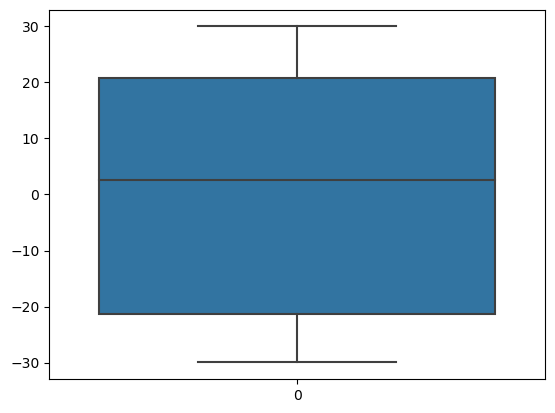

In [5]:
sns.boxplot(df["feature_1"])

<Axes: >

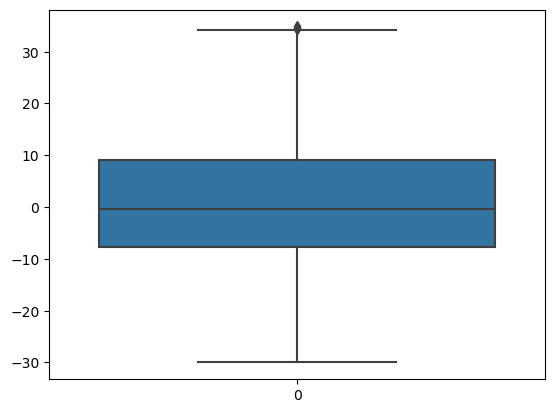

In [6]:
sns.boxplot(df["feature_2"])

<Axes: xlabel='feature_1', ylabel='feature_2'>

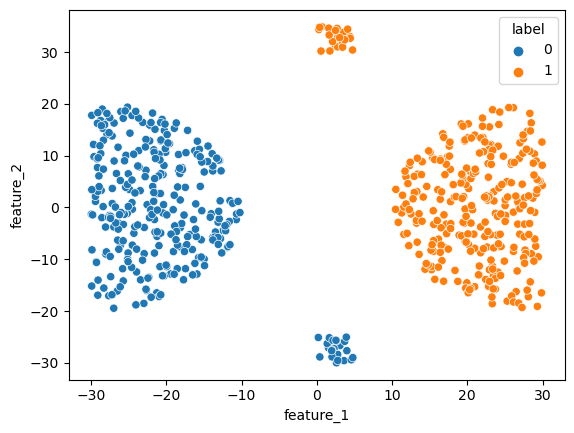

In [8]:
sns.scatterplot(data=df,x="feature_1",y="feature_2",hue="label")

In [9]:
## removing the outlier datapoints
df=df[df["feature_2"]<31]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 581 entries, 0 to 599
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  581 non-null    float64
 1   feature_2  581 non-null    float64
 2   label      581 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 18.2 KB


#### splitting the data into input and output features as x and y 

In [11]:
## splitting the data into input and output
x=df[["feature_1","feature_2"]]

## typecasting label column as int 
y=df["label"].astype(int)

In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int32

#### splitting the data into train and test 

In [13]:
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.9)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(522, 2) (522,)
(59, 2) (59,)


#### scaling the input features of both X_train,X_test 

In [14]:
scalar=StandardScaler()

### scaling X_train
X_train=scalar.fit_transform(X_train)



## scaling X_test 
X_test=scalar.transform(X_test)

#### building the logical structure 

In [22]:
model=Sequential()
model.add(Dense(6,activation="tanh",input_dim=2))
model.add(Dense(3,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))
 

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 18        
                                                                 
 dense_4 (Dense)             (None, 3)                 21        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (172.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### compiling the model 

In [24]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(X_train,y_train,batch_size=10,epochs=30,validation_split=0.1)

Epoch 1/30
47/47 [==============================] - 1s 8ms/step - loss: 0.9517 - accuracy: 0.0704 - val_loss: 0.7703 - val_accuracy: 0.2075
Epoch 2/30
47/47 [==============================] - 0s 3ms/step - loss: 0.6528 - accuracy: 0.6695 - val_loss: 0.5624 - val_accuracy: 1.0000
Epoch 3/30
47/47 [==============================] - 0s 3ms/step - loss: 0.4965 - accuracy: 1.0000 - val_loss: 0.4513 - val_accuracy: 1.0000
Epoch 4/30
47/47 [==============================] - 0s 3ms/step - loss: 0.4069 - accuracy: 1.0000 - val_loss: 0.3816 - val_accuracy: 1.0000
Epoch 5/30
47/47 [==============================] - 0s 3ms/step - loss: 0.3473 - accuracy: 1.0000 - val_loss: 0.3320 - val_accuracy: 1.0000
Epoch 6/30
47/47 [==============================] - 0s 4ms/step - loss: 0.3036 - accuracy: 1.0000 - val_loss: 0.2937 - val_accuracy: 1.0000
Epoch 7/30
47/47 [==============================] - 0s 4ms/step - loss: 0.2692 - accuracy: 1.0000 - val_loss: 0.2626 - val_accuracy: 1.0000
Epoch 8/30
47/47 [==

#### plotting the train test loss 

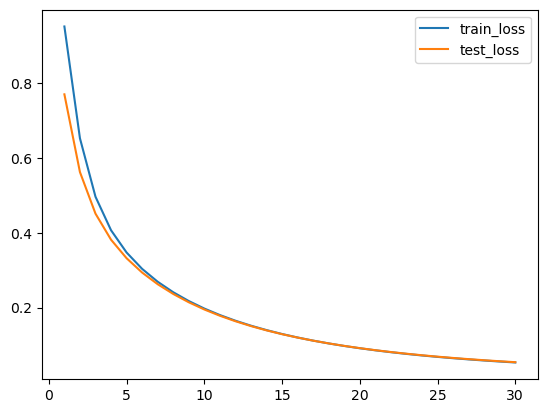

In [25]:
plt.plot(range(1,31),history.history["loss"],label="train_loss")
plt.plot(range(1,31),history.history["val_loss"],label="test_loss") 
plt.legend() 

#### finding the predicted values using model 

In [26]:
predicted=model.predict(X_test)
predicted

2/2 [==============================] - 0s 5ms/step


array([[0.9487244 ],
       [0.04356395],
       [0.04416297],
       [0.93514925],
       [0.95168084],
       [0.05107329],
       [0.0440322 ],
       [0.9448816 ],
       [0.04395062],
       [0.93390816],
       [0.9490736 ],
       [0.05361409],
       [0.9362997 ],
       [0.9511597 ],
       [0.95474106],
       [0.04293866],
       [0.06677405],
       [0.94956917],
       [0.9522335 ],
       [0.04935851],
       [0.955846  ],
       [0.9407831 ],
       [0.9524791 ],
       [0.0464238 ],
       [0.95202845],
       [0.9479414 ],
       [0.04257314],
       [0.04291162],
       [0.94556624],
       [0.04022003],
       [0.9378634 ],
       [0.95108503],
       [0.9551241 ],
       [0.04594459],
       [0.04875769],
       [0.9559793 ],
       [0.05922885],
       [0.03855721],
       [0.04193742],
       [0.05395596],
       [0.03716169],
       [0.94880164],
       [0.05140946],
       [0.04095825],
       [0.90992117],
       [0.90862715],
       [0.08188599],
       [0.914

#### converting the predicted probablities to the respective labels

In [27]:
predicted=np.where(predicted>0.5,1,0)
predicted 

array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1]])

#### evaluating the model 

1.0


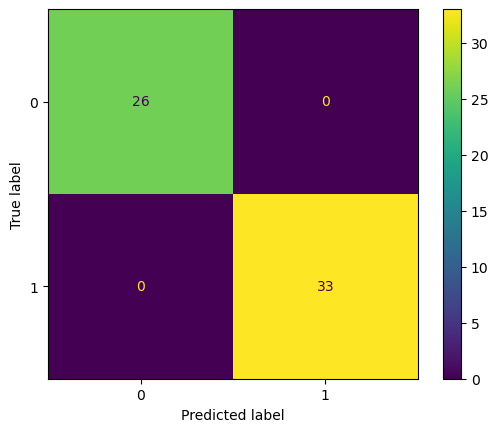

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show() 

#### creating the decision surface 

In [29]:
from mlxtend.plotting  import plot_decision_regions


9600/9600 [==============================] - 17s 2ms/step


<Axes: >

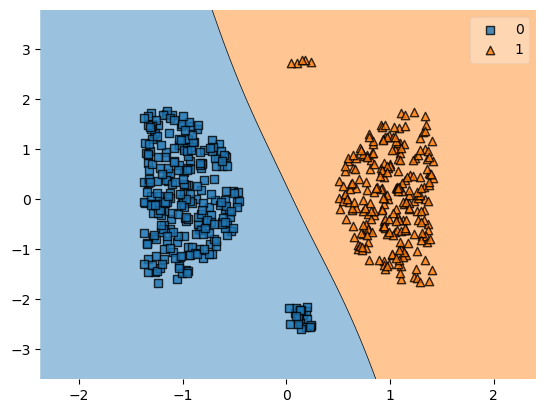

In [30]:
plot_decision_regions(X_train,y_train.values,clf=model)

9600/9600 [==============================] - 19s 2ms/step


<Axes: >

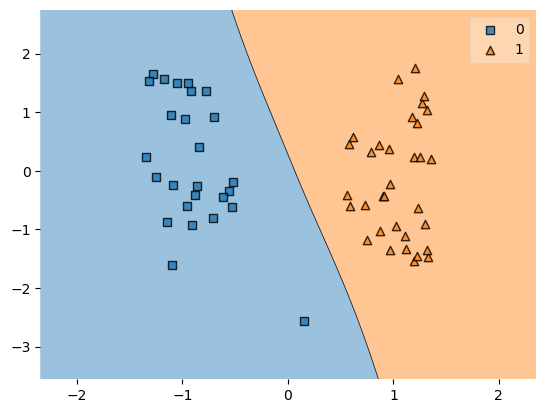

In [31]:
#for test data 
plot_decision_regions(X_test,y_test.values,clf=model)

#### Model Summary 


- This neural network model is showing accuracy of 100 percent
- We have used 2 hidden layers.
- In the First Hidden layers we have used 6 neurons and activation function as tanh.
- In the second hidden layers we have used 3 neurons and activation function as tanh.
- In the output layer we have used sigmoid as the activation function. 
- For compiling the model we haved loss as binary cross entropy,optimizer as SGD with batch size of 10 with learning rate of 0.01. 
- No of epochs used for training this model is 30.